In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.utils import to_categorical, plot_model 
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

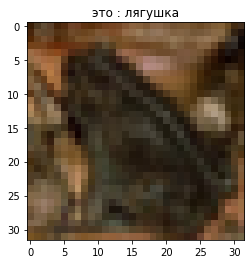

In [4]:
N = 30

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [5]:
res = {}

### model

In [6]:
# инициализация  модели
input1 = Input(shape=(32, 32, 3))

x1 = Conv2D(64, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(input1)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x1)
x3 = Conv2D(192, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x2)
x4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x3)
# x5 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x4)
# x6 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x5)
x7 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x4)
x8 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x7)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x9 = Flatten()(x8)
# полносвязный слой
x10 = Dense(84, activation='tanh')(x9)
# выходной слой с функцией активации softmax
out_x = Dense(10, activation='softmax')(x10)

model1 = Model(inputs = input1, outputs = out_x)
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model1.summary()
model1.save_weights('model1.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 11, 64)         9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 6, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 6, 192)         307392    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 3, 192)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 3, 256)         442624    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 256)         0     

In [7]:
def model_fit(model, data_augmentation):
    if not data_augmentation:
        print('Не используется data augmentation')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    else:
        print('Использование data augmentation в реальном времени')
        # Препроцессинг и data augmentation в реальном времени:
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False, 
            zca_epsilon=1e-06, 
            rotation_range=0, 
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0., 
            zoom_range=0., 
            channel_shift_range=0.,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0)

        # запуск data augmentation через fit
        #datagen.fit(x_train)

        # запуск data augmentation через fit_generator
        model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            workers=4)

In [8]:
model1.load_weights('model1.h5')
model_fit(model1, False)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.1006 - accuracy: 0.2301 - val_loss: 1.6681 - val_accuracy: 0.3804
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5737 - accuracy: 0.4288 - val_loss: 1.4230 - val_accuracy: 0.4750
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3910 - accuracy: 0.5015 - val_loss: 1.3843 - val_accuracy: 0.4955
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2849 - accuracy: 0.5408 - val_loss: 1.2590 - val_accuracy: 0.5490
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1878 - accuracy: 0.5762 - val_loss: 1.2951 - val_accuracy: 0.5335


In [9]:
# проверка работы обученной модели
res['model1'] = model1.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 2s 5ms/step - loss: 1.2951 - accuracy: 0.5335


,test_score
model1,0.5335


### model augmentation true

In [10]:
model1.load_weights('model1.h5')
model_fit(model1, True)

Использование data augmentation в реальном времени
Epoch 1/5


C:\Users\snetkova\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 34s 21ms/step - loss: 1.9638 - accuracy: 0.2805 - val_loss: 1.6937 - val_accuracy: 0.3965
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6056 - accuracy: 0.4181 - val_loss: 1.4644 - val_accuracy: 0.4604
Epoch 3/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4638 - accuracy: 0.4711 - val_loss: 1.4412 - val_accuracy: 0.4896
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3743 - accuracy: 0.5047 - val_loss: 1.2858 - val_accuracy: 0.5315
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3024 - accuracy: 0.5329 - val_loss: 1.1987 - val_accuracy: 0.5709


In [11]:
res['model1_aug'] = model1.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 2s 5ms/step - loss: 1.1987 - accuracy: 0.5709


,test_score
model1,0.5335
model1_aug,0.5709


Результат на тесте получили чуть выше

### model add layers

In [12]:
# инициализация  модели
input1 = Input(shape=(32, 32, 3))

x1 = Conv2D(64, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(input1)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x1)
x3 = Conv2D(192, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x2)
x4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x3)
x5 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x4)
x6 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x5)
x7 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x6)
x8 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x7)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x9 = Flatten()(x8)
# полносвязный слой
x10 = Dense(84, activation='tanh')(x9)
# выходной слой с функцией активации softmax
out_x = Dense(10, activation='softmax')(x10)

model2 = Model(inputs = input1, outputs = out_x)
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model2.summary()
model2.save_weights('model2.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 11, 64)         9472      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 6, 192)         307392    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 3, 192)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 3, 384)         663936    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 3, 384)         1327

In [13]:
model2.load_weights('model2.h5')
model_fit(model2, True)

Использование data augmentation в реальном времени
Epoch 1/5


C:\Users\snetkova\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 138s 88ms/step - loss: 2.2164 - accuracy: 0.1681 - val_loss: 1.8990 - val_accuracy: 0.2967
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.8053 - accuracy: 0.3373 - val_loss: 1.5241 - val_accuracy: 0.4416
Epoch 3/5
1563/1563 [==============================] - 140s 89ms/step - loss: 1.5789 - accuracy: 0.4199 - val_loss: 1.4419 - val_accuracy: 0.4676
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4633 - accuracy: 0.4676 - val_loss: 1.4515 - val_accuracy: 0.4709
Epoch 5/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3815 - accuracy: 0.4960 - val_loss: 1.2475 - val_accuracy: 0.5503


In [14]:
res['model2_layers'] = model2.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 3s 10ms/step - loss: 1.2475 - accuracy: 0.5503


,test_score
model1,0.5335
model1_aug,0.5709
model2_layers,0.5503


Добавление двух сверточных слоев снизило точность на тесте

### model add kernels

In [15]:
# инициализация  модели
input1 = Input(shape=(32, 32, 3))

x1 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(input1)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x1)
x3 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x2)
x4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x3)
# x5 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x4)
# x6 = Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(x5)
x7 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x4)
x8 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x7)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x9 = Flatten()(x8)
# полносвязный слой
x10 = Dense(168, activation='tanh')(x9)
# выходной слой с функцией активации softmax
out_x = Dense(10, activation='softmax')(x10)

model3 = Model(inputs = input1, outputs = out_x)
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model3.summary()
model3.save_weights('model3.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 11, 128)        18944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 6, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 6, 384)         1229184   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 3, 384)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 3, 512)         1769984   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 2, 512)         0   

In [16]:
model3.load_weights('model3.h5')
model_fit(model3, True)

Использование data augmentation в реальном времени
Epoch 1/5


C:\Users\snetkova\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 180s 115ms/step - loss: 2.1060 - accuracy: 0.2248 - val_loss: 1.6777 - val_accuracy: 0.4008
Epoch 2/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.6219 - accuracy: 0.4093 - val_loss: 1.4422 - val_accuracy: 0.4826
Epoch 3/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.4538 - accuracy: 0.4743 - val_loss: 1.2949 - val_accuracy: 0.5338
Epoch 4/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.3626 - accuracy: 0.5090 - val_loss: 1.2181 - val_accuracy: 0.5643
Epoch 5/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.2830 - accuracy: 0.5404 - val_loss: 1.1550 - val_accuracy: 0.5894


In [17]:
res['model1_kernels'] = model3.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 4s 12ms/step - loss: 1.1550 - accuracy: 0.5894


,test_score
model1,0.5335
model1_aug,0.5709
model2_layers,0.5503
model1_kernels,0.5894


А вот увеличение количества ядер дало небольшой рост метрики

### concatenation v1

In [18]:
datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False, 
            zca_epsilon=1e-06, 
            rotation_range=0, 
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0., 
            zoom_range=0., 
            channel_shift_range=0.,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0)

In [19]:
main_input = Input(shape=(32, 32, 3))
x11 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x12 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x11)
x13 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x12)
x14 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x13)
x15 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x14)
x16 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x15)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x17 = Flatten()(x16)
# полносвязный слой
first_dense = Dense(168, activation='tanh')(x17)

# second_input = Input(shape=(32, 32, 3))
x21 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x22 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x21)
x23 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x22)
x24 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x23)
x25 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x24)
x26 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x25)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x27 = Flatten()(x26)
# полносвязный слой
second_dense = Dense(168, activation='tanh')(x27)


# third_input = Input(shape=(32, 32, 3))
x31 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x32 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x31)
x33 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x32)
x34 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x33)
x35 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x34)
x36 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x35)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x37 = Flatten()(x36)
# полносвязный слой
third_dense = Dense(168, activation='tanh')(x37)

# merge = Concatenate(axis = 1)([x16, x26, x36])
merge = Concatenate(axis = 1)([first_dense, second_dense, third_dense])

# merge = Flatten()(merge)
# merge = Dense(168, activation='tanh')(merge)
merge = Dense(10, activation='softmax')(merge)

model4 = Model(inputs=main_input, outputs = merge)
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model4.summary()
model4.save_weights('model4.h5')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 8, 11, 128)   18944       input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 8, 11, 128)   18944       input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 8, 11, 128)   18944       input_4[0][0]                    
____________________________________________________________________________________________

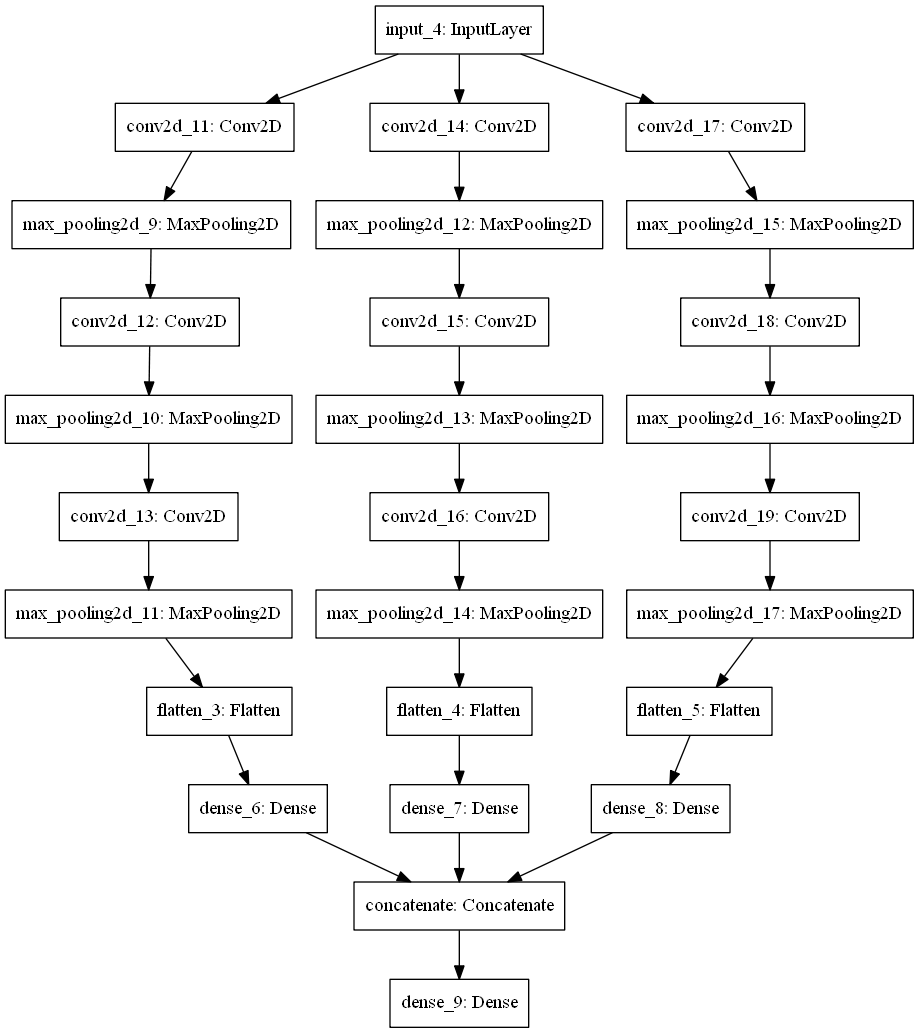

In [20]:
plot_model(model4)

In [21]:
%%time
model4.load_weights('model4.h5')
# model4.fit(x_train, y_train,
#                   batch_size=batch_size,
#                   epochs=epochs,
#                   validation_data=(x_test, y_test),
#                   shuffle=True)
model4.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

C:\Users\snetkova\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1563/1563 [==============================] - 596s 381ms/step - loss: 2.1443 - accuracy: 0.2194 - val_loss: 1.7104 - val_accuracy: 0.3834
Epoch 2/5
1563/1563 [==============================] - 560s 358ms/step - loss: 1.7297 - accuracy: 0.3749 - val_loss: 1.5201 - val_accuracy: 0.4568
Epoch 3/5
1563/1563 [==============================] - 558s 357ms/step - loss: 1.5441 - accuracy: 0.4390 - val_loss: 1.4742 - val_accuracy: 0.4638
Epoch 4/5
1563/1563 [==============================] - 557s 356ms/step - loss: 1.4402 - accuracy: 0.4817 - val_loss: 1.3183 - val_accuracy: 0.5260
Epoch 5/5
1563/1563 [==============================] - 557s 356ms/step - loss: 1.3713 - accuracy: 0.5072 - val_loss: 1.2457 - val_accuracy: 0.5480
Wall time: 47min 7s


In [22]:
res['model1_x3_concat'] = model4.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 10s 33ms/step - loss: 1.2457 - accuracy: 0.5480


,test_score
model1,0.5335
model1_aug,0.5709
model2_layers,0.5503
model1_kernels,0.5894
model1_x3_concat,0.5480


Сильно потеряли в точности

### concatenation v2

In [23]:
main_input = Input(shape=(32, 32, 3))
x11 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x12 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x11)
x13 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x12)
x14 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x13)

# second_input = Input(shape=(32, 32, 3))
x21 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x22 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x21)
x23 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x22)
x24 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x23)


# third_input = Input(shape=(32, 32, 3))
x31 = Conv2D(128, kernel_size=(7, 7), strides=(4, 3), activation='relu',  padding="same")(main_input)
x32 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x31)
x33 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(x32)
x34 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x33)

first_merge = Concatenate(axis = 1)([x14, x24, x34])

x53 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(first_merge)
x55 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x53)
x56 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x55)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x57 = Flatten()(x56)
# полносвязный слой
dense31 = Dense(168, activation='tanh')(x57)

x43 = Conv2D(384, kernel_size=(5, 5), strides=(1, 1), activation='relu',  padding="same")(first_merge)
x45 = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x43)
x46 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x45)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x47 = Flatten()(x46)
# полносвязный слой
dense32 = Dense(168, activation='tanh')(x47)

second_merge = Concatenate(axis = 1)([dense31, dense32])
merge = Dense(10, activation='softmax')(second_merge)

model5 = Model(inputs=main_input, outputs = merge)
model5.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model5.summary()
model5.save_weights('model5.h5')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 8, 11, 128)   18944       input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 8, 11, 128)   18944       input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 8, 11, 128)   18944       input_5[0][0]                    
____________________________________________________________________________________________

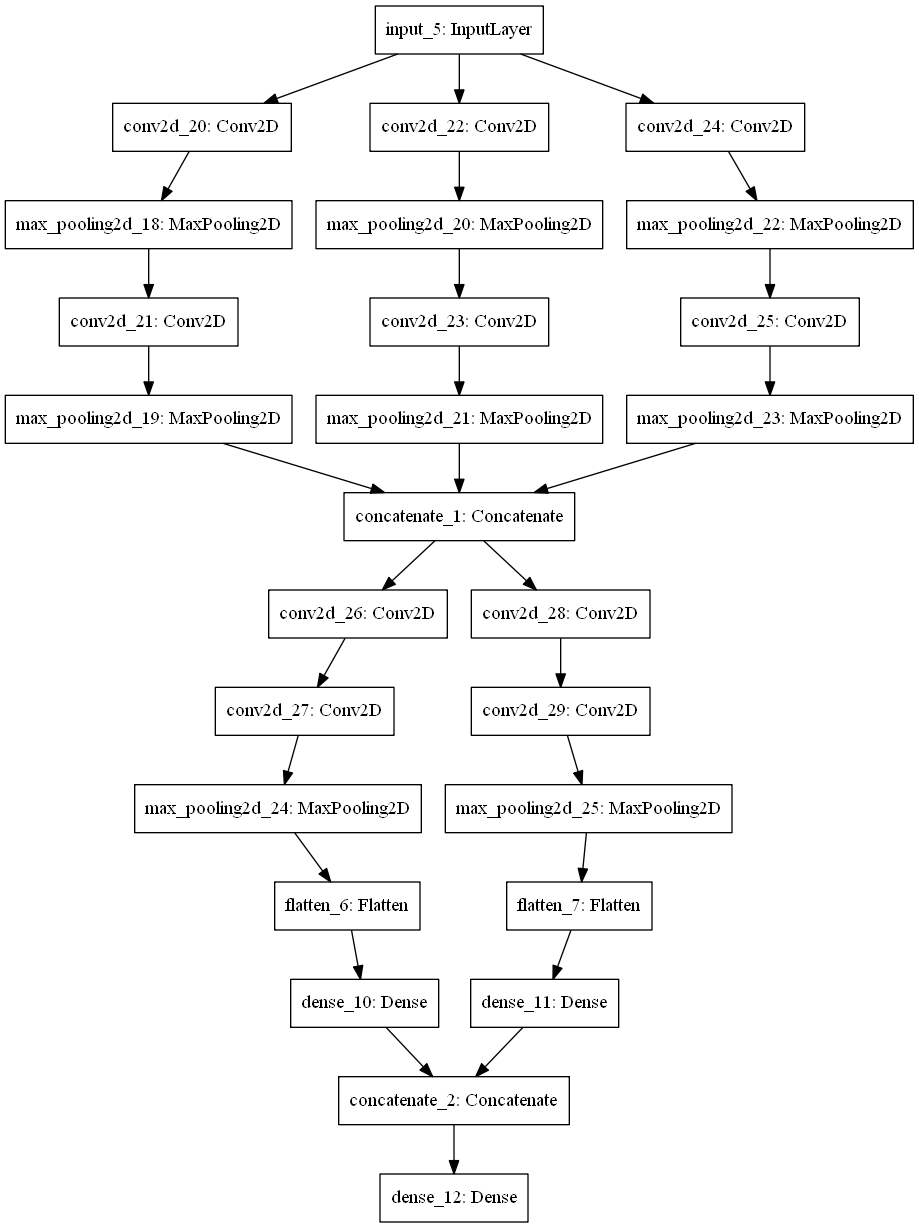

In [24]:
plot_model(model5)

In [25]:
%%time
model5.load_weights('model5.h5')
# model5.fit(x_train, y_train,
#                   batch_size=batch_size,
#                   epochs=epochs,
#                   validation_data=(x_test, y_test),
#                   shuffle=True)
model5.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

C:\Users\snetkova\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1563/1563 [==============================] - 990s 633ms/step - loss: 2.1381 - accuracy: 0.2133 - val_loss: 1.6902 - val_accuracy: 0.3955
Epoch 2/5
1563/1563 [==============================] - 1010s 646ms/step - loss: 1.6887 - accuracy: 0.3869 - val_loss: 1.4490 - val_accuracy: 0.4644
Epoch 3/5
1563/1563 [==============================] - 1010s 646ms/step - loss: 1.5010 - accuracy: 0.4568 - val_loss: 1.3695 - val_accuracy: 0.5002
Epoch 4/5
1563/1563 [==============================] - 1014s 649ms/step - loss: 1.4032 - accuracy: 0.4925 - val_loss: 1.3216 - val_accuracy: 0.5272
Epoch 5/5
1563/1563 [==============================] - 1015s 649ms/step - loss: 1.3281 - accuracy: 0.5203 - val_loss: 1.1865 - val_accuracy: 0.5770
Wall time: 1h 23min 59s


In [26]:
res['model1_x3_concat_x2'] = model5.evaluate(x_test, y_test, verbose=1)[1]
pd.DataFrame.from_dict(res, orient='index', columns = ['test_score'])

313/313 [==============================] - 21s 67ms/step - loss: 1.1865 - accuracy: 0.5770


,test_score
model1,0.5335
model1_aug,0.5709
model2_layers,0.5503
model1_kernels,0.5894
model1_x3_concat,0.5480
model1_x3_concat_x2,0.5770


И даже такая химера оказалась хуже обычной последовательной модели с увеличенным количестовм ядер

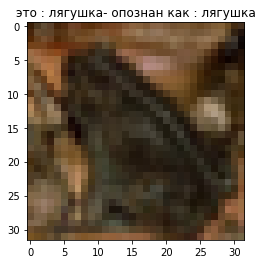

In [27]:
N = 30
y_p=model5.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [28]:
# сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)